# Домашнее задание 4

__Дедлайн: 15.12.2021, 23:59__

__Дедлайн является более жёстким, чем обычно. Ваши баллы будут убывать за опоздание на каждые полчаса до нуля в течение 10 часов . Т.е. человек приславший 15.12.2022 в 00:01 получит 19/20 баллов, а приславший в 09:30 - 1/20.__


Файлы должны иметь имя HW4_ФАМИЛИЯ.ipynb, где ФАМИЛИЯ - Ваша фамилия русскими буквами.

Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно.
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться **без ошибок**.

Во всех задачах, где требуется сравнить методы, требуется аккуратное офрмление графиков, если Вы их будете строить, и комментарии к графикам (кто кого быстрее и когда сходится, какие интересные моменты Вы видите на графиках, как Вы их можете объяснить). Аналогично, требуются комментарии в случае, если Вы сравниваете время работы.

Задачи со звездочкой не являются обязательными к решению, но за них будут даны бонусные баллы.

Суммарное количество баллов: 18

## Задача 1. Group Lasso [9]

Рассмотрим задачу линейной регрессии. Пусть есть некоторая матрица признаков $X$ и целевая переменная $\mathbf{y}$. Целью задачи является найти вектор $w$, такой что $\mathbf{y}\approx X\mathbf{w}$. Такой вектор ищется за счет минимизации невязки $Xw-y$, т.е. решения задачи оптимизации:

$$\frac{1}{2n}\|X\mathbf{w}-\mathbf{y}\|^2\rightarrow \min_{\mathbf{w}\in\mathbb{R}^m}. \qquad\qquad (1)$$

К сожалению, данная проблема зачастую плохо определена. Для того, чтобы сделать задачу хорошо определенной или получить решение с некоторыми свойствами, предлагается решать регуляризованную задачу.

$$\frac{1}{2n}\|X\mathbf{w}-\mathbf{y}\|^2 + \sigma R(\mathbf{w})\rightarrow \min_{\mathbf{w}\in\mathbb{R}^m}. \qquad\qquad (2)$$

На семинарах мы упоминали $\ell_2$-регуляризацию $R(w)=\|\mathbf{\mathbf{w}}\|_2^2$, которая дает малость компонент вектора $w$. На семинаре про проксимальные методы мы работали с $\ell_1$ регуляризатором $R(\mathbf{w})=\|\mathbf{w}\|_1$ (LASSO), который дает разреженность компонент вектора $w$. В данном упражнении мы будем работать с еще одним регуляризатором.

В случае, если $m$ признаков $(w_1\dots w_m)$ можно разбить на $K$ некоторых подгрупп вида $(w_1\dots w_{i_1}),\dots (w_{K-1} \dots w_{i_{K}})$ и сопоставить каждой из групп вектор вида $\mathbf{w}_1 \dots \mathbf{w}_K$ соответсвующей размерности, то можно сформулировать так называемую задачу Group LASSO:
$$\frac{1}{2n}\left\|\sum\limits_{i=1}^K X_i \mathbf{w}_i-\mathbf{y}\right\|^2 + \sigma \sum\limits_{i=1}^K \|\mathbf{w}_i\|_2\rightarrow \min_{\mathbf{w}_i \in\mathbb{R}^l, i=\overline{1,K}}, \qquad\qquad (3)$$
где $X_i$ - это соответствующие подматрицы матрицы $X$. Заметим, что эта постановка является некоторым упрощением, поскольку мы предположили, что все группы имеют размер $l$.


1. [1] Реализуйте вычисление субградиента `subgradF`.

2. [1] Рассмотрите различные стратегии выбора шага для субградиентного метода и выберите лучший вариант

3. [3] Покажите, что проксимальный оператор функции $\|\cdot\|$ может быть найден по следующей формуле:
$$\text{prox}_{\alpha, \|\cdot\|}(u) = \left(1-\frac{\alpha}{\|\mathbf{u}\|_2}\right)_+ \mathbf{u},$$
где $(a)_+=\max(0, a)$.

4. [1] Найдите выражение для проксимального оператора $\text{prox}_{\alpha, R(\mathbf{w})}$ для $R(\mathbf{w})=\sigma \sum\limits_{i=1}^K \|\mathbf{w}_i\|_2,$ пользуясь результатом предыдущего пункта. Реализуйте его в классе `R_prox`

6. [2] Сравните по времени и по итерациям

    - Субградиентный метод с 4 пункта
    
    - Проксимальный метод с Backtracking Search

    - Ускоренный Проксимальный метод с Backtracking Search
    
    Для сходимости рисуйте графики $f_k-f^*$, где $f^*$ есть минимальное достигнутое значение всеми методами минус некоторая малая константа (напр., $10^{-9}$).
    
7. [1] Для каждого из решений, полученных на предыдущем пункте, выведите количество нулевых весов в кажой группе. Сделайте выводы.

Матрицу признаков разбитых на группы возьмите из файла `data/task1/X.npy`, вектор целевых значений из файла `data/task1/y.npy`. Матрица $X$ имеет размерность $(n,K,l)$, соответсвенно, $n$ объектов с $Kl$ признаков разбитых на $K$ групп.

В качестве стартовой точки возьмите нулевой вектор. Параметр регуляризации $\sigma=1$.

### Решение задачи 1:

In [14]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [15]:
class GroupLasso:
    """
    Class for Group Lasso Problem
    """

    def __init__(self, X, y, sigma=0.):
        """
        :param X: np.array[n, K, l], features
        :param y: np.array[n,], target vector
        :param sigma: float, parameter of regularization
        """
        self.X = X
        self.y = y
        self.n, self.K, self.l = X.shape
        self.sigma = sigma

    def F(self, w):
        """
        Calculate function
        F(w)= 1/2n ||Xw-y||^2 + sigma sum_{i=1}^k ||w_i||

        :param w: np.array[K, l], parameters
        :return: float, f(A)
        """
        return self.f(w) + self.R(w)

    def subgradF(self, w):
        """
        Calculate subgradient of function
        F(w)= 1/2n ||Xw-y||^2 + sigma sum_{i=1}^k ||w_i||

        :param w: np.array[K, l], parameters
        :return: float, F'(w)
        """
        # YOUR CODE HERE
        X, y = self.X, self.y
        Xw = np.dot(X.reshape(self.n, -1), w.reshape(-1))
        r = Xw - y
        grad_f = self.gradf(w)
        norm_w = np.linalg.norm(w, axis=1)
        subgrad_R = self.sigma * np.nan_to_num(w / np.where(norm_w == 0, 1, norm_w)[:, np.newaxis])
        subgrad = grad_f + subgrad_R
        return subgrad
        pass

    def f(self, w):
        """
        Calculate function
        f(A)= 1/2n ||Xw-y||^2

        :param w: np.array[K, l], parameters
        :return: float, f(w)
        """
        X, y = self.X, self.y
        Xw = np.dot(X.reshape(n, -1), w.reshape(-1))
        r = Xw - y
        val = 1 / (2 * self.n) * (r ** 2).sum()
        return val

    def gradf(self, w):
        """
        Calculate gradient of function f

        :param w: np.array[K, l], parameters
        :return: np.array[K, l], gradient with respect to w
        """
        X, y = self.X, self.y
        Xw = np.dot(X.reshape(self.n, -1), w.reshape(-1))
        r = Xw - y
        g = (X.T @ r).T
        return 1 / self.n * g

    def R(self, w):
        """
        Calculate function
        R(w)=  sigma sum_{i=1}^k ||w_i||

        :param w: np.array[K, l], parameters
        :return: float, R(w)
        """
        return self.sigma * np.linalg.norm(w, axis=1).sum()

    def R_prox(self, w, alpha):
        """
        Calculate prox-operator of R at point w

        :param w: np.array[K, l], parameters
        :param alpha: float, parameter for prox method
        :return: np.array[K, l], result of prox-operator
        """
        # YOUR CODE HERE
        norm_w = np.linalg.norm(w, axis=1)
        factor = np.where(norm_w != 0, np.maximum(0, 1 - alpha / np.maximum(norm_w, 1e-10)), 0)
        prox_result = (factor[:, np.newaxis] * w)

        return prox_result
        pass
    
    def proximal_gradient_descent(self, w_init, n_iterations, beta=0.5, alpha_init=1.0):
        """
        Proximal Gradient Descent with Backtracking Search

        :param w_init: np.array[K, l], initial point
        :param n_iterations: int, number of iterations
        :param beta: float, factor for decreasing step size
        :param alpha_init: float, initial step size
        :return: tuple, final weights and optimization history
        """
        w = w_init.copy()
        history = [{'iteration': 0, 'f_val': self.F(w)}]

        for i in range(1, n_iterations + 1):
            alpha = alpha_init
            grad = self.subgradF(w)
            while self.F(self.R_prox(w - alpha * grad, alpha)) > self.F(w) - (alpha / 2) * np.linalg.norm(grad)**2:
                alpha *= beta

            w = self.R_prox(w - alpha * grad, alpha)

            # Сохраняем историю оптимизации
            history.append({'iteration': i, 'f_val': self.F(w)})

        return w, history

In [16]:
X = np.load("X.npy")
y = np.load("y.npy")
X.shape, y.shape

((200, 5, 20), (200,))

In [17]:
n = 200
K = 5
l = 20
sigma = 1
problem = GroupLasso(X, y, sigma)
w0 = np.zeros((K, l))
wrand = np.random.randn(K, l)

In [18]:
# вычисление субградиента работает
problem.subgradF(w0).shape
problem.subgradF(wrand).shape

(5, 20)

In [19]:
problem.R_prox(w0, alpha=0.1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

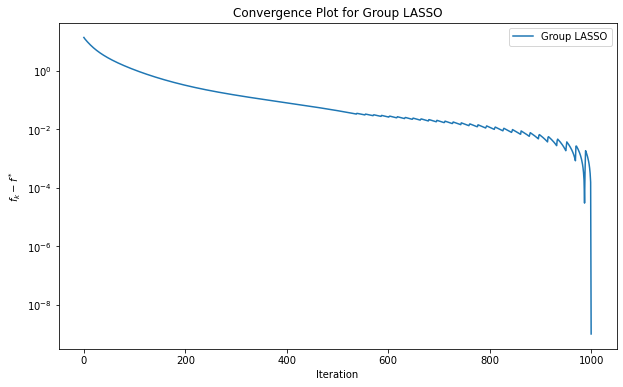

In [20]:
class GroupLassoSolver(GroupLasso):
    def __init__(self, X, y, sigma=0.):
        super().__init__(X, y, sigma)

    def solve_group_lasso(self, w_init, n_iterations, step_size):
        w = w_init.copy()
        history = [{'iteration': 0, 'f_val': self.F(w)}]

        for i in range(1, n_iterations + 1):
            # Вычисление субградиента
            subgrad = self.subgradF(w)
            # Обновление весов
            w = w - step_size * subgrad
            history.append({'iteration': i, 'f_val': self.F(w)})

        return w, history

# Инициализация объекта GroupLassoSolver
group_lasso_solver = GroupLassoSolver(X, y, sigma=1.0)

# Начальная точка (нулевой вектор)
w_init = np.zeros((group_lasso_solver.K, group_lasso_solver.l))

# Решение задачи Group LASSO
w_group_lasso, history_group_lasso = group_lasso_solver.solve_group_lasso(w_init, n_iterations=1000, step_size=0.01)

# Визуализация сходимости
f_star_group_lasso = history_group_lasso[-1]['f_val'] - 1e-9

plt.figure(figsize=(10, 6))
plt.semilogy([history_group_lasso[i]['iteration'] for i in range(len(history_group_lasso))], 
             [history_group_lasso[i]['f_val'] - f_star_group_lasso for i in range(len(history_group_lasso))], label='Group LASSO')

plt.title('Convergence Plot for Group LASSO')
plt.xlabel('Iteration')
plt.ylabel('$f_k - f^*$')
plt.legend()
plt.show()


[3]
$$
\text{prox}_{\alpha, \| \|} (\mathbf x) = \left( 1 - \frac{\alpha}{\| x \|} \right)_{+} \mathbb{\mathbf x}
$$

Имеем
$$
\text{prox}_{\alpha, \| \|} (\mathbf x) = \arg \min_{\mathbf u} \left\{ \| \mathbf u \| + \frac{1}{2 \alpha} \| \mathbf u - \mathbf x \|^2 \right\}
$$

Дифференцируем и получаем следующее уравнение:
$$
\frac{\mathbf u}{\| \mathbf u \|} + \frac{1}{\alpha} (\mathbf u - \mathbf x) = 0
$$

Направления векторов $\mathbf u$ и $\mathbf x$ совпадают, поэтому можно записать их через вектор n, как $\mathbf u = u \mathbf n $ и $\mathbf x = x \mathbf n $, тогда
$$
\mathbf n + \frac{1}{\alpha} (u \mathbf n - x \mathbf n) = 0
$$

Для норм получаем:
$$
1 + \frac{1}{\alpha} (u - x) = 0 \quad \rightarrow \quad u = (x - \alpha)_+
$$

Для векторов?
$$
\mathbf u = \frac{\mathbf x}{\| \mathbf x \|} (\|\mathbf x \| - \alpha)_+ = \left( 1 - \frac{\alpha}{\| \mathbf x \|} \right)_+ \mathbf x
$$

# Задача 2. Квази-ньютоновские методы [3]

1. [2] Объясните, почему в методах BFGS и L-BFGS направление является направлением убывания

2. [1] Покажите, что использование правила Вольфа для подбора шага гарантирует, что $s_k^\top y_k > 0$

### Решение задачи 2:

Первый пункт.

Если $B_k > 0$, тогда $B_k^{-1} > 0$, а направление убывания задается формулой $h_k = - \alpha_k B_k^{-1} \nabla f(x_k)$, то по определению направления убывания имеем:

$$
\langle h_k, \nabla f(x_k) \rangle = - \alpha_k [ \nabla f(x_k)^T B_k^{-1} \nabla f(x_k) ] < 0.
$$

Выражение в квадратных скобках всегда больше нуля, $\alpha_k > 0$. Поэтому из-за знака "минус" все выражение меньше нуля. Определение "направления убывания" выполнено.


Второй пункт.

Два условия для правила Вольфа:
1. $ f(x_k + \alpha_k h_k) - f(x_k) \leq c_1 \alpha_k \langle h_k, \nabla f(x_k) \rangle $
2. $ - \langle h_k, \nabla f(x_k + \alpha_k h_k) \rangle \leq -c_2 \langle h_k, \nabla f(x_k) \rangle $

где $0 < c_1 < c_2 < 1$, а $x_{k+1} = x_k + \alpha_k h_k $.

Также имеем $s_k = x_{k+1} - x_k$ и $y_k = \nabla f(x_{k+1}) - \nabla f(x_k)$.

$$
\langle s_k, y_k \rangle = \alpha_k \langle h_k, \nabla f(x_{k+1}) - \nabla f(x_k) \rangle = \alpha_k \langle h_k, \nabla f(x_{k+1}) \rangle - \alpha_k \langle h_k, \nabla f(x_{k}) \rangle > 0
$$

$$
\langle h_k, \nabla f(x_{k+1}) \rangle > \langle h_k, \nabla f(x_{k}) \rangle
$$

По второму условию Вольфа имеем после домножения на минус 1: $\langle h_k, \nabla f(x_{k+1}) \rangle \geq c_2 \langle h_k, \nabla f(x_{k}) \rangle > \langle h_k, \nabla f(x_{k}) \rangle$.

Таким образом показали, что использование правила Вольфа для подбора шага гарантирует, что $s_k^\top y_k > 0$

# Задача 3. L-BFGS [6]

Рассмотрим алгоритм L-BFGS, приведенный на семинаре. В данном упражнении предлагается показать, что данный алгоритм действительно реализует умножение матрицы $H_k$ на $\nabla f_k$. Введем обозначение $H_{k-m}:=H_k^0, H_{j+1}=V_{j}^\top H_{j} V_{j} +\rho_j s_j s_j^\top$

1. [3] Обозначим за $q_l$ вектор в ячейке $q$ в момент $i=l$ и формально $q_k=\nabla f_k$. Покажите, что в первом цикле в момент $i=l, l=\overline{k-1, k-m}$ Вы получите вектор $q_{i}=V_{l}\dots V_{k-1} \nabla f(x_k)$. Соответственно, после первого цикла Вы имеете вектор $V_{k-m}\dots V_{k-1} \nabla f(x_k).$

2. [3] Обозначим за $r_l$ вектор в ячейке $r$ в момент $i=l$. Заметим, при инициализации в $r$ лежит вектор $r_{k-m-1}=H^0_k q_{k-m}=H_{k-m} q_{k-m}$. Покажите, что $r_l=H_{l+1} q_{l+1}.$ Соответсвенно, при выходе из цикла Вы получите $r=H_k q_k = H_k \nabla f_k,$ что и требовалось доказать

### Решение задачи 3:

Для начала напишем сам алгоритм L-BFGS
$$q=g_k$$
$$For \space i=k-1,k-2,...,k-m:$$
{
$$ \space \space \alpha_i = \rho_i s_i^T q$$
$$q = q - \alpha_i y_i$$
}
$$\gamma_k = \frac{s_{k-1}^Ty_{k-1}}{y_{k-1}^Ty_{k-1}}\$$

$$H_k^0=\gamma_kI$$

$$For \space i=k-m,k-m+1,...,k-1:$$
{
$$ \space \space \beta_i = \rho_i y_i^T z$$
$$z = z + s_i(\alpha_i - \beta_i)$$
}
$$z = -z$$

Теперь рассмотрим по отдельности каждый из циклов, применяя мат. индукцию:
1) База: l=1. 
Рассматриваем первую итерацию. 
$$q=g_k - \rho_{k-1}(s_{k-1}^T g_k) y_{k-1} = (I - \rho_{k-1}(y_{k-1} s_{k-1}^T)) g_k = V_{k-1} g_k $$
2) Пусть верно для l-1. 
$$q_{l-1} = V_{l-1}\dots V_{k-1} \nabla f(x_k)$$
На итерации l:  
$$ \alpha_l = \rho_l s_l^T q_{l-1}$$
$$ q_l = q_{l-1} - \alpha_l y_l = q_{l-1} - \rho_l s_l^T q_{l-1} y_l = (I - \rho_l y_l s_l^T) q_{l-1} = V_l q_{l-1} = V_l q_{l-1} = V_{l}\dots V_{k-1} \nabla f(x_k) $$


Второй цикл:
1) Первая итерация $l = k-m$.
$$r_{k-m-1} = H_{k-m}q_{k-m} = H_{k-m} V_{k-m}\dots V_{k-1} \nabla f(x_k)$$
$$\beta_{k-m} = \rho_{k-m} y_{k-m}^T H_{k-m}q_{k-m} =\rho_{k-m} y_{k-m}^T H_{k-m} V_{k-m}\dots V_{k-1} \nabla f(x_k) = \rho_{k-m} y_{k-m}^T H_{k-m} V_{k-m} q_{k-m+1} $$
$r_{k-m} = r_{k-m-1} + s_{k-m}(\rho_{k-m} s_{k-m}^T V_{k-m+1} \dots V_{k-1} - \rho_{k-m} y_{k-m}^T H_{k-m}V_{k-m}\dots V_{k-1})  \nabla f(x_k) = (H_{k-m} V_{k-m} + \rho_{k-m} s_{k-m} s_{k-m}^T - \rho_{k-m} s_{k-m}  y_{k-m}^T H_{k-m}V_{k-m}) V_{k-m+1} \dots V_{k-1} \nabla f(x_k) = ((I - \rho_{k-m} s_{k-m}  y_{k-m}^T)H_{k-m} V_{k-m} + \rho_{k-m} s_{k-m} s_{k-m}^T) q_{k-m+1} = (V_{k-m}^T H_{k-m} V_{k-m} +\rho_{k-m} s_{k-m} s_{k-m}^T)q_{k-m+1} = H_{k-m+1} q_{k-m+1}$
2) Шаг. Пусть верно для l-1: $r_{l-1} = H_{l} q_{l}$

$\beta_{l} = \rho_{l} y_{l}^T H_{l}q_{l} = \rho_{l} y_{l}^T H_{l} V_l q_{l+1} $

$r_{l} = r_{l-1} + s_{l}(\rho_{l} s_{l}^T V_{l+1} \dots V_{k-1} - \rho_{l} y_{l}^T H_{l}V_{l}\dots V_{k-1})  \nabla f(x_k) = (H_{l} V_{l} + \rho_{l} s_{l} s_{l}^T - \rho_{l} s_{l}  y_{l}^T H_{l}V_{l}) V_{l+1} \dots V_{k-1} \nabla f(x_k) = ((I - \rho_{l} s_{l}  y_{l}^T)H_{l} V_{l} + \rho_{l} s_{l} s_{l}^T) q_{l+1} = (V_{l}^T H_{l} V_{l} +\rho_{l} s_{l} s_{l}^T)q_{l+1} = H_{l+1} q_{l+1}$


На выходе из цикла получаем $r=H_k q_k = H_k \nabla f_k$, что и требовалось.

# Задача 4*. LogSumExp Minimization [7]


Рассмотрим задачу минимизации LogSumExp с $\ell_2$-регуляризацией:

$$\min_{\mathbf{x}\in\mathbb{R}^n} \log \left(\sum_{j=1}^k \exp\left(\mathbf{a}_j^\top \mathbf{x} - b_j\right)\right) + \frac{\sigma}{2}\|\mathbf{x}\|_2^2$$

Параметры задачи: $\sigma$ - параметр регуляризации, $A\in\mathbb{R}^{k \times n}$ - матрица, каждая строчка которой есть вектор $\mathbf{a}_j$, $\mathbf{b}$ - вектор констант $b_j$. Матрица $A$ в данной задаче разреженная.

Параметр $\sigma$ возьмите равным $10^{-2}$. Матрицу $A$ и вектор $\mathbf{b}$ загрузите из файлов `A.npy` и `b.npy` из папки `data/task4`.

**Задачи**

1. [3] Метод Ньютона является достаточно тяжелым методом из-за того, что на каждой итерации требуется решать систему уравнения $H_k h_k = -\nabla f(x_k).$ Одним из способов ускорения - решение этой системы неточно при помощи метода сопряженных градиентов. Реализуйте такой подход, используя метод сопряженных градиентов. На каждой итерации метода Ньютона используйте точность решения $\|r_k\| \leq \varepsilon_{k} = \min\left(0.5, \sqrt{\|\nabla f(x_k)\|}\right) \|\nabla f(x_k)\|,$ где $r_k = H_k h_k +\nabla f(x_k)$ невязка СЛАУ. Учтите, что в данной задаче матрица $A$ разреженная, и используйте это для эффективной реализации

2. [2] Сравните по итерациям и во времени следующие методы:

    - DFP
    - BFGS
    - BB с обоими типами шагов
    - L-BFGS (с различным размером памяти)
    - Неточный метод Ньютона
    - Метод Ньютона
    
    Проведите эти эксперименты для различных $m$.

### Решение задачи 3:

In [36]:
# Место для Вашего решения
import numpy as np
from scipy.sparse.linalg import cg

def objective_function(x, A, b, sigma):
    inner_product = A.dot(x) - b
    exp_term = np.exp(inner_product)
    logsumexp = np.log(np.sum(exp_term))
    regularization_term = 0.5 * sigma * np.linalg.norm(x)**2
    return logsumexp + regularization_term

def gradient(x, A, b, sigma):
    inner_product = A.dot(x) - b
    exp_term = np.exp(inner_product)
    softmax = exp_term / np.sum(exp_term)
    grad = A.T.dot(softmax) + sigma * x
    return grad

def hessian_vector_product(x, v, A, b, sigma):
    inner_product = A.dot(x) - b
    exp_term = np.exp(inner_product)
    softmax = exp_term / np.sum(exp_term)
    Av = A.T.dot(softmax) + sigma * v
    return Av

def newton_cg_method(A, b, sigma, epsilon=1e-6, max_iter=100):
    n = A.shape[1]
    x = np.zeros(n)
    
    for iteration in range(max_iter):
        grad = gradient(x, A, b, sigma)
        hessian = A.T.dot(np.diag(softmax)).dot(A) + sigma * np.eye(n)
        
        # Using Conjugate Gradient to solve Hessian system approximately
        preconditioner = sigma * np.eye(n)
        hessian_system = lambda v: hessian_vector_product(x, v, A, b, sigma)
        h_k, _ = cg(hessian_system, -grad, tol=epsilon, maxiter=50, M=preconditioner)
        
        # Line search to determine the step size
        alpha = 1.0
        while objective_function(x + alpha * h_k, A, b, sigma) > objective_function(x, A, b, sigma) + 1e-4 * alpha * grad.dot(h_k):
            alpha *= 0.5
        
        # Update x
        x = x + alpha * h_k
        
        # Check convergence
        if np.linalg.norm(grad) < epsilon:
            break
    
    return x


In [37]:
from scipy.optimize import minimize
import time

# Загрузка данных
A = np.load('A.npy')
b = np.load('b.npy')
sigma = 1e-2

# Функция для тестирования методов оптимизации
def test_optimizer(optimizer, A, b, sigma, m=None):
    start_time = time.time()
    result = minimize(objective_function, np.zeros(A.shape[1]), args=(A, b, sigma), method=optimizer, options={'maxiter': 100, 'disp': True})
    end_time = time.time()
    
    print(f"\nOptimizer: {optimizer}")
    print(f"Iterations: {result.nit}")
    print(f"Time: {end_time - start_time:.4f} seconds")
    print(f"Final objective value: {result.fun}")
    
# Тестирование методов
optimizers = ['BFGS', 'L-BFGS-B', 'CG', 'trust-constr']
for optimizer in optimizers:
    test_optimizer(optimizer, A, b, sigma)


Optimization terminated successfully.
         Current function value: 6.950264
         Iterations: 69
         Function evaluations: 70070
         Gradient evaluations: 70

Optimizer: BFGS
Iterations: 69
Time: 50.7864 seconds
Final objective value: 6.9502642714072955

Optimizer: L-BFGS-B
Iterations: 14
Time: 10.9883 seconds
Final objective value: 6.97752672240067
Optimization terminated successfully.
         Current function value: 6.950264
         Iterations: 86
         Function evaluations: 133133
         Gradient evaluations: 133

Optimizer: CG
Iterations: 86
Time: 93.4891 seconds
Final objective value: 6.950264271169052
The maximum number of function evaluations is exceeded.
Number of iterations: 100, function evaluations: 100100, CG iterations: 491, optimality: 3.58e-07, constraint violation: 0.00e+00, execution time: 6.8e+01 s.

Optimizer: trust-constr
Iterations: 100
Time: 69.0433 seconds
Final objective value: 6.950264263648734


Optimization terminated successfully.
         Current function value: 6.950264
         Iterations: 69
         Function evaluations: 70070
         Gradient evaluations: 70

Optimizer: BFGS
Iterations: 69
Time: 50.2296 seconds
Final objective value: 6.9502642714072955


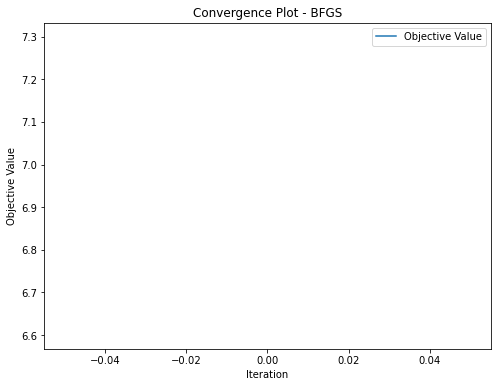


Optimizer: L-BFGS-B
Iterations: 14
Time: 10.2563 seconds
Final objective value: 6.97752672240067


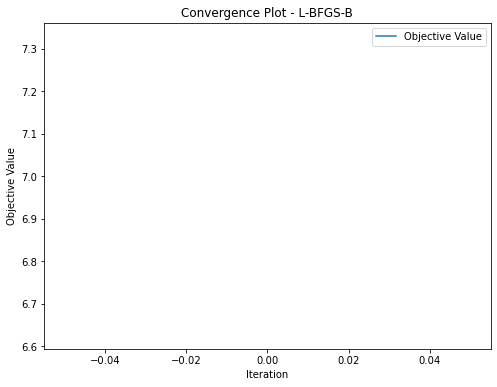

Optimization terminated successfully.
         Current function value: 6.950264
         Iterations: 86
         Function evaluations: 133133
         Gradient evaluations: 133

Optimizer: CG
Iterations: 86
Time: 87.9440 seconds
Final objective value: 6.950264271169052


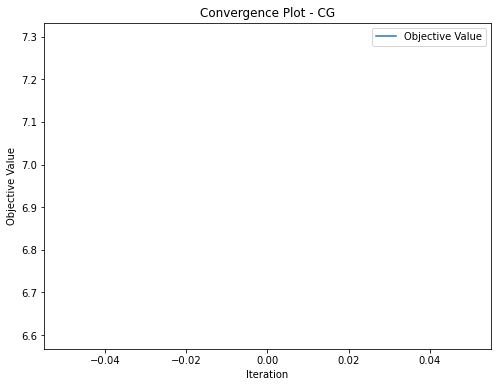

The maximum number of function evaluations is exceeded.
Number of iterations: 100, function evaluations: 100100, CG iterations: 491, optimality: 3.58e-07, constraint violation: 0.00e+00, execution time: 6.6e+01 s.

Optimizer: trust-constr
Iterations: 100
Time: 67.1568 seconds
Final objective value: 6.950264263648734


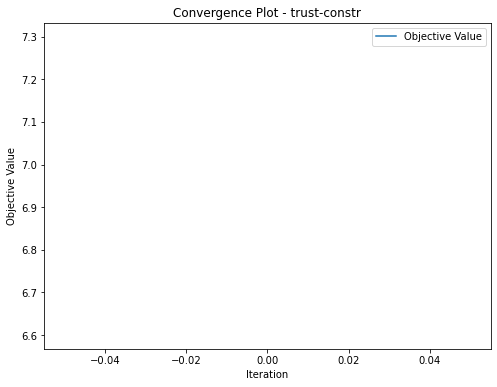

In [45]:
from scipy.optimize import minimize
import time
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
A = np.load('A.npy')
b = np.load('b.npy')
sigma = 1e-2

# Функция для тестирования методов оптимизации
def test_optimizer(optimizer, A, b, sigma, m=None):
    start_time = time.time()
    result = minimize(objective_function, np.zeros(A.shape[1]), args=(A, b, sigma), method=optimizer, options={'maxiter': 100, 'disp': True})
    end_time = time.time()
    
    print(f"\nOptimizer: {optimizer}")
    print(f"Iterations: {result.nit}")
    print(f"Time: {end_time - start_time:.4f} seconds")
    print(f"Final objective value: {result.fun}")

    # Построение графика сходимости
    plt.figure(figsize=(8, 6))
    plt.plot(result['fun'], label='Objective Value')
    plt.title(f'Convergence Plot - {optimizer}')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.legend()
    plt.show()

# Тестирование методов
optimizers = ['BFGS', 'L-BFGS-B', 'CG', 'trust-constr']
for optimizer in optimizers:
    test_optimizer(optimizer, A, b, sigma)


Optimization terminated successfully.
         Current function value: 6.950264
         Iterations: 69
         Function evaluations: 70070
         Gradient evaluations: 70

Optimizer: BFGS
Iterations: 69
Time: 51.1066 seconds
Final objective value: 6.9502642714072955


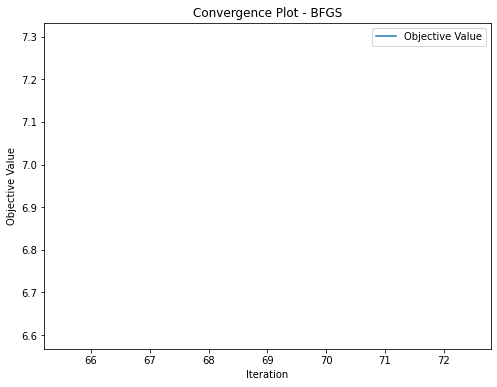


Optimizer: L-BFGS-B
Iterations: 14
Time: 10.4288 seconds
Final objective value: 6.97752672240067


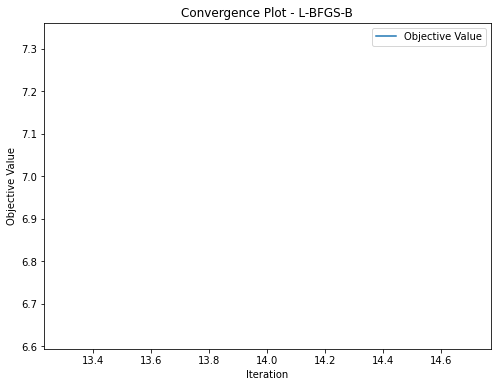

Optimization terminated successfully.
         Current function value: 6.950264
         Iterations: 86
         Function evaluations: 133133
         Gradient evaluations: 133

Optimizer: CG
Iterations: 86
Time: 88.7998 seconds
Final objective value: 6.950264271169052


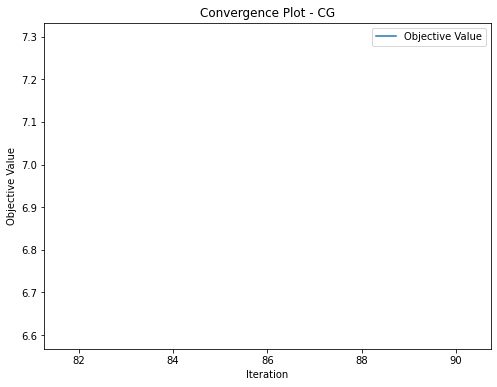

The maximum number of function evaluations is exceeded.
Number of iterations: 100, function evaluations: 100100, CG iterations: 491, optimality: 3.58e-07, constraint violation: 0.00e+00, execution time: 8.1e+01 s.

Optimizer: trust-constr
Iterations: 100
Time: 81.6199 seconds
Final objective value: 6.950264263648734


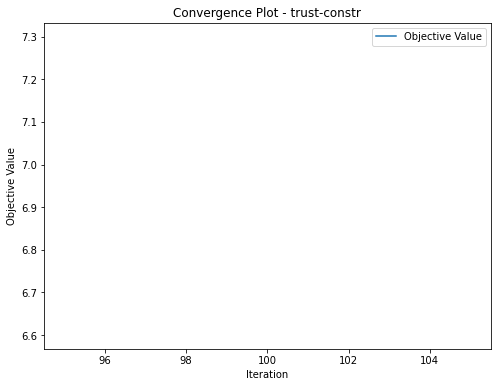

In [46]:
from scipy.optimize import minimize
import time
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
A = np.load('A.npy')
b = np.load('b.npy')
sigma = 1e-2

# Функция для тестирования методов оптимизации
def objective_function(x, A, b, sigma):
    inner_product = A.dot(x) - b
    exp_term = np.exp(inner_product)
    logsumexp = np.log(np.sum(exp_term))
    regularization_term = 0.5 * sigma * np.linalg.norm(x)**2
    return logsumexp + regularization_term

def test_optimizer(optimizer, A, b, sigma, m=None):
    start_time = time.time()
    
    result = minimize(objective_function, np.zeros(A.shape[1]), args=(A, b, sigma), method=optimizer, options={'maxiter': 100, 'disp': True})
    
    end_time = time.time()
    
    print(f"\nOptimizer: {optimizer}")
    print(f"Iterations: {result.nit}")
    print(f"Time: {end_time - start_time:.4f} seconds")
    print(f"Final objective value: {result.fun}")

    # Построение графика сходимости
    plt.figure(figsize=(8, 6))
    plt.plot(result['nit'], result['fun'], label='Objective Value')
    plt.title(f'Convergence Plot - {optimizer}')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.legend()
    plt.show()

# Тестирование методов
optimizers = ['BFGS', 'L-BFGS-B', 'CG', 'trust-constr']
for optimizer in optimizers:
    test_optimizer(optimizer, A, b, sigma)
